In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import re

In week four we've learned about a few different classifiers. In week five we'll learn about webscraping, APIs, and Natural Language Processing (NLP). This project will put those skills to the test.

For project 3, your goal is two-fold:

1. Using Pushshift's API, you'll collect posts from two subreddits of your choosing.
2. You'll then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

In order to not take up too much time, I have created another notebook to create a CSV 

In [506]:
df = pd.read_csv('reddit_df.csv')

In [507]:
df = df.drop(columns = 'Unnamed: 0')

In [508]:
lemmatizer = WordNetLemmatizer()

In [509]:
df['subreddit'] = df['subreddit'].map({'KDRAMA': 1, 'kpop': 0})

In [510]:
df.head()

,author,id,score,subreddit,title,selftext,created_utc,num_comments
0,bon123bon,qx7ouc,1,1,Best Kdrama Crying Scene?,"I was watching You Are My Spring, and DAMN in ...",1637294345,0
1,Ems_Dilemma,qx0urn,1,1,Goblin is so much more than just visuals!,Goblin is so very pleasing to the eyes! And I'...,1637273050,0
2,sianiam,qwkajs,1,1,The Weekly Binge: Life On Mars - Episodes 3 - 4,Welcome to the Weekly Binge Discussion of [**L...,1637219736,0
3,AutoModerator,qwk2he,1,1,"The Thursday Round-Up: Links to Our Rules, Pol...",This is your weekly reminder that we have rule...,1637218810,0
4,masbond84,quig97,1,1,[2021.11.08~2021.11.14] Prime-time Drama Viewe...,# Monday-Tuesday\n\n|Network|Drama|Day/Time|Ep...,1636988743,19


In [556]:
sent_tokenize(df['selftext'][0])

['I was watching You Are My Spring, and DAMN in episode 9 when Da Jung is revisiting a repressed memory (keeping it vague due to spoilers, obvi) and she just breaks down in a way that I have *never* seen before from an actor in kdramas.',
 'The bulging eyes, fighting to break, the inability to properly keep their literal composure (hands flailing as if by reflex).',
 'I know that many actors channel painful experiences from their own pasts in order to really immerse themselves in their crying scenes but WOW.',
 "I don't ever think I've witnessed a more intense crying scene.",
 '**....',
 'BUT**\n\nI know there must be rivals for the best, most heart-rendering crying scenes out there.']

In [557]:
word_tokenize(df['selftext'][0])

['I',
 'was',
 'watching',
 'You',
 'Are',
 'My',
 'Spring',
 ',',
 'and',
 'DAMN',
 'in',
 'episode',
 '9',
 'when',
 'Da',
 'Jung',
 'is',
 'revisiting',
 'a',
 'repressed',
 'memory',
 '(',
 'keeping',
 'it',
 'vague',
 'due',
 'to',
 'spoilers',
 ',',
 'obvi',
 ')',
 'and',
 'she',
 'just',
 'breaks',
 'down',
 'in',
 'a',
 'way',
 'that',
 'I',
 'have',
 '*',
 'never',
 '*',
 'seen',
 'before',
 'from',
 'an',
 'actor',
 'in',
 'kdramas',
 '.',
 'The',
 'bulging',
 'eyes',
 ',',
 'fighting',
 'to',
 'break',
 ',',
 'the',
 'inability',
 'to',
 'properly',
 'keep',
 'their',
 'literal',
 'composure',
 '(',
 'hands',
 'flailing',
 'as',
 'if',
 'by',
 'reflex',
 ')',
 '.',
 'I',
 'know',
 'that',
 'many',
 'actors',
 'channel',
 'painful',
 'experiences',
 'from',
 'their',
 'own',
 'pasts',
 'in',
 'order',
 'to',
 'really',
 'immerse',
 'themselves',
 'in',
 'their',
 'crying',
 'scenes',
 'but',
 'WOW',
 '.',
 'I',
 'do',
 "n't",
 'ever',
 'think',
 'I',
 "'ve",
 'witnessed',
 'a

In [558]:
tokenizer = RegexpTokenizer(r'\w+')

In [561]:
selftext_tokens = tokenizer.tokenize(df['selftext'][0].lower())

In [562]:
selftext_tokens

['i',
 'was',
 'watching',
 'you',
 'are',
 'my',
 'spring',
 'and',
 'damn',
 'in',
 'episode',
 '9',
 'when',
 'da',
 'jung',
 'is',
 'revisiting',
 'a',
 'repressed',
 'memory',
 'keeping',
 'it',
 'vague',
 'due',
 'to',
 'spoilers',
 'obvi',
 'and',
 'she',
 'just',
 'breaks',
 'down',
 'in',
 'a',
 'way',
 'that',
 'i',
 'have',
 'never',
 'seen',
 'before',
 'from',
 'an',
 'actor',
 'in',
 'kdramas',
 'the',
 'bulging',
 'eyes',
 'fighting',
 'to',
 'break',
 'the',
 'inability',
 'to',
 'properly',
 'keep',
 'their',
 'literal',
 'composure',
 'hands',
 'flailing',
 'as',
 'if',
 'by',
 'reflex',
 'i',
 'know',
 'that',
 'many',
 'actors',
 'channel',
 'painful',
 'experiences',
 'from',
 'their',
 'own',
 'pasts',
 'in',
 'order',
 'to',
 'really',
 'immerse',
 'themselves',
 'in',
 'their',
 'crying',
 'scenes',
 'but',
 'wow',
 'i',
 'don',
 't',
 'ever',
 'think',
 'i',
 've',
 'witnessed',
 'a',
 'more',
 'intense',
 'crying',
 'scene',
 'but',
 'i',
 'know',
 'there',
 '

In [563]:
p_stemmer = PorterStemmer()

In [511]:
# df['selftext'].str.isascii()

#.extract('(\w[a-zA-Z]+\w)')

In [512]:
cvec = CountVectorizer(stop_words='english')

In [513]:
X = df['selftext']
y = df['subreddit']

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [515]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [516]:
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [517]:
X_train_cvec.shape

(1203, 30904)

In [518]:
X_test_cvec.shape

(594, 30904)

# First Model

In [519]:
X_train_df = pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names())

In [520]:
X_train_df['kdrama_or_kpop'] = y_train.values

In [566]:
X_train_df['kdrama_or_kpop'].mean()

0.6118038237738986

Baseline score would be that there are 0.61 chance of the data leaning towards kdrama than kpop.

<AxesSubplot:>

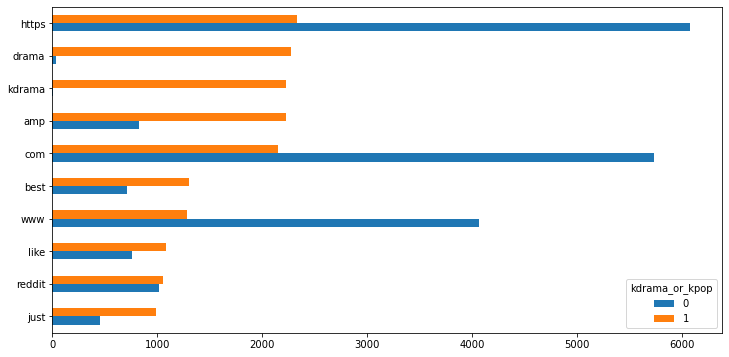

In [521]:
X_train_df.groupby('kdrama_or_kpop').sum().T.sort_values(1, ascending=False).head(10).sort_values(1).plot(kind='barh', figsize=(12, 6))

Let's conduct sys to see if we can get rid of the https, com and all unneccesary words. When taking this most used words in our subreddits and comparing it to the different subreddits (KDRAMA or kpop), I have found that there were lots of links. By looking art the chart, I have decided to delete columns like 'www', 'https', and 'com'. I found it disturbing to the research.

In [522]:
sys.getsizeof(X_train_cvec)

48

In [523]:
sys.getsizeof(X_train_cvec.todense())

144

In [524]:
X_train_df = pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names())

In [525]:
X_train_df.drop(columns = ['www', 'https', 'com'], inplace=True)

In [526]:
X_test.drop(columns = ['www', 'https', 'com'], inplace=True)

<AxesSubplot:>

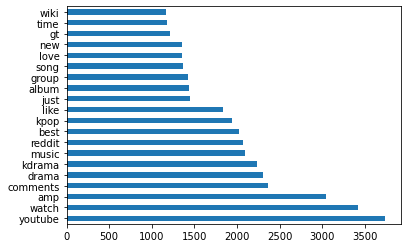

In [527]:
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh')

After deleting the three columns, we are able to see the most common words include 'youtube', 'drama', 'kdrama', 'kpop' and 'music'. 

In [528]:
X_train_df['kdrama_or_kpop'] = y_train.values
X_train_df.groupby('kdrama_or_kpop').sum().T.sort_values(1, ascending=False).head(20)

kdrama_or_kpop,0,1
drama,33,2275
kdrama,7,2225
amp,823,2223
best,715,1306
like,755,1085
reddit,1013,1055
just,458,991
gt,262,953
wiki,225,947
air,25,944


In [529]:
df['subreddit']

0       1
1       1
2       1
3       1
4       1
       ..
1792    0
1793    0
1794    0
1795    0
1796    0
Name: subreddit, Length: 1797, dtype: int64

Logistic Regression

In [530]:
logreg = LogisticRegression()
logreg.fit(X_train_cvec, y_train)

LogisticRegression()

In [531]:
logreg.score(X_train_cvec, y_train), logreg.score(X_test_cvec, y_test)

(0.999168744804655, 0.9646464646464646)

In [532]:
preds = logreg.predict(X_test_cvec)

In [533]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       230
           1       0.99      0.95      0.97       364

    accuracy                           0.96       594
   macro avg       0.96      0.97      0.96       594
weighted avg       0.97      0.96      0.96       594



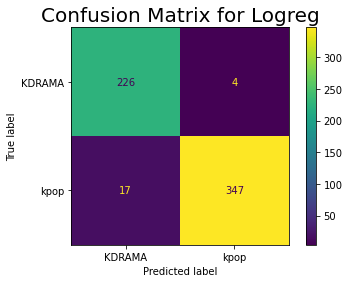

In [534]:
plot_confusion_matrix(logreg, X_test_cvec, y_test, display_labels=['KDRAMA', 'kpop'])
plt.title('Confusion Matrix for Logreg', fontsize=20)
plt.savefig('logreg_CM.png');

This logistics Regression Model gave a really good prediction in predicting the true kpop and KDRAMA. When running through our test model, we only had 21 false KDRAMA and kpop in total.

In [554]:
logreg.coef_.mean()

6.133443797130044e-05

# Second Model

In [535]:
X = df['selftext']
y = df['subreddit']


In [536]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [537]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [538]:
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [539]:
knn_pipe = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

In [540]:
knn_pipe.fit(X_train_cvec, y_train)

Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                ('knn', KNeighborsClassifier())])

In [541]:
cross_val_score(knn_pipe, X_train_cvec, y_train).mean()

0.5834854771784233

In [542]:
knn_pipe.score(X_train_cvec, y_train), knn_pipe.score(X_test_cvec, y_test)

(0.7173732335827099, 0.5521885521885522)

In [543]:
predictions = logreg.predict(X_test_cvec)

In [544]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       230
           1       0.99      0.95      0.97       364

    accuracy                           0.96       594
   macro avg       0.96      0.97      0.96       594
weighted avg       0.97      0.96      0.96       594



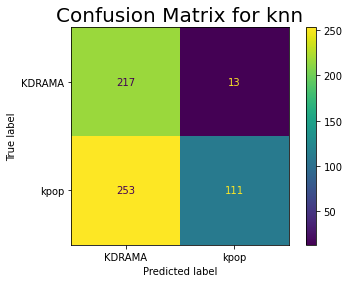

In [545]:
plot_confusion_matrix(knn_pipe, X_test_cvec, y_test, display_labels=['KDRAMA', 'kpop'])
plt.title('Confusion Matrix for knn', fontsize=20)
plt.savefig('knn_cm.png');

This Confusion Matrix shows that although the prediction for KDRAMA was good, the kpop had a lot of false kdrama. Only 111 words were True but other KDRAMA predictions should have been kpop. There were 253 kpop rows that i missed and 13 KDRAMA rows.